# Chapter 17: Regression

Up to this point, we've been working with classification models, where we try to determine what something is.

Now, we're curious about determining a specific value based on an input.

Thus, we need a new way to measure loss, and a new output layer activation function.

It also means our data are different, we need training data that have  target scalar values, not classes.

## 17.1. Linear Activation

To predict a scalar value, we use a linear activation function for the output layer.

This linear function does not modify its input and passes it to the output:  $y=x$.

For the backward pass, we already know the derivative of $f(x)=x$ is $1$.

In [1]:
# Linear activation
class Activation_Linear:

    # Forward pass
    def forward(self, inputs):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()

This might raise a question — why do we even write some code that does nothing? We just pass inputs to outputs for the forward pass and do the same with gradients during the backward pass since, to apply the chain rule, we multiply incoming gradients by the derivative, which is 1 . We do this only for completeness and clarity to see the activation function of the output layer in the model definition code. From a computational time point of view, this adds almost nothing to the processing time, at least not enough to noticeably impact training times.

Now we just need to figure out loss!

## 17.2. Mean Squared Error Loss

Since we aren’t working with classification labels anymore, we cannot calculate cross-entropy.

Two main methods for calculating error in regression are mean squared error (MSE) and mean absolute error (MAE).

With mean squared error , you square the difference between the predicted and true values of single outputs (as the model can have multiple regression outputs) and average those squared values.

$$
L_i = \frac{1}{J} \sum_j ( y_{i, \ j} - \hat{y}_{i, \ j} )^2
$$

$y$ means the target value, $\hat{y}$ means predicted value, index $i$ means the current sample, index $j$ means the current output in this sample, and the $J$ means the number of outputs.

## 17.3. Mean Squared Error Loss Derivative

The partial derivative of squared error with respect to the predicted value is:

$$
\begin{align}
\frac{∂ }{∂ \hat{y}_{i, \ j} } L_i &=   \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[  \frac{1}{J} \sum_j ( y_{i, \ j} - \hat{y}_{i, \ j} )^2 \Big] =  \frac{1}{J} \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} }  ( y_{i, \ j} - \hat{y}_{i, \ j} )^2 \\
& =  \frac{1}{J} \cdot 2 \cdot ( y_{i, \ j} - \hat{y}_{i, \ j} )^{2-1} \cdot  \frac{∂ }{∂ \hat{y}_{i, \ j} } [ y_{i, \ j} - \hat{y}_{i, \ j}  ] \\
& =  \frac{2}{J} \cdot ( y_{i, \ j} - \hat{y}_{i, \ j} )^1 \cdot ( \frac{∂ }{∂ \hat{y}_{i, \ j} }  y_{i, \ j} - \frac{∂ }{∂ \hat{y}_{i, \ j} }  \hat{y}_{i, \ j}  ) = \frac{2}{J} \cdot ( y_{i, \ j} - \hat{y}_{i, \ j} ) \cdot ( 0 - 1 )  \\
& = \frac{2}{J} \cdot ( y_{i, \ j} - \hat{y}_{i, \ j} ) \cdot ( - 1 ) = - \frac{2}{J} \cdot ( y_{i, \ j} - \hat{y}_{i, \ j} )  \
\end{align}
$$

The partial derivative equals -2 , multiplied by the subtraction of the true and predicted values, and then divided by the number of outputs to normalize the gradients, making their magnitude invariant to the number of outputs.

## 17.4. Mean Absolute Error Loss

With mean absolute error , you take the absolute difference between the predicted and true values in a single output and average those absolute values:

$$
L_i = \frac{1}{J} \sum_j \big| y_{i, \ j} - \hat{y}_{i, \ j} \big|
$$

$y$ means the target value, $\hat{y}$ means predicted value, index $i$ means the current sample, index $j$ means the current output in this sample, and the $J$ means the number of outputs.

This function, used as a loss, penalizes the error linearly. It produces sparser results and is robust to outliers, which can be both advantageous and disadvantageous. In reality, L1 (MAE) loss is used less frequently than L2 (MSE) loss.

## 17.5. Mean Absolute Error Loss Derivative

The partial derivative for absolute error with respect to the predicted values is:

$$
\begin{alignat}{2}
\frac{∂ }{∂ \hat{y}_{i, \ j} } L_i  & = \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[ \frac{1}{J} \sum_j \big| y_{i, \ j} - \hat{y}_{i, \ j} \big| \Big] \\
& = \frac{1}{J} \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} }  \big| y_{i, \ j} - \hat{y}_{i, \ j} \big| \\
& = \frac{1}{J} \cdot  \begin{cases}
1 & \quad y_{i, \ j} - \hat{y}_{i, \ j} > 0\\
-1 & \quad y_{i, \ j} - \hat{y}_{i, \ j} < 0
\end{cases} \
\end{alignat}
$$

## 17.6. Accuracy in Regression

Now that we’ve got data, an activation function, and a loss calculation for regression, we’d like to measure performance.

With cross-entropy, we were able to count the number of matches (situations where the prediction equals the ground truth target), and then divide it by the number of samples to measure the model’s accuracy.

With a regression model, we have two problems:

1) Each output neuron in the model is a separate output.

2) The prediction is a float value, and we can’t simply check if the output value equals the ground truth one, as it most likely won’t — if it differs even slightly, the accuracy will be a 0.

## 17.7. Full Code


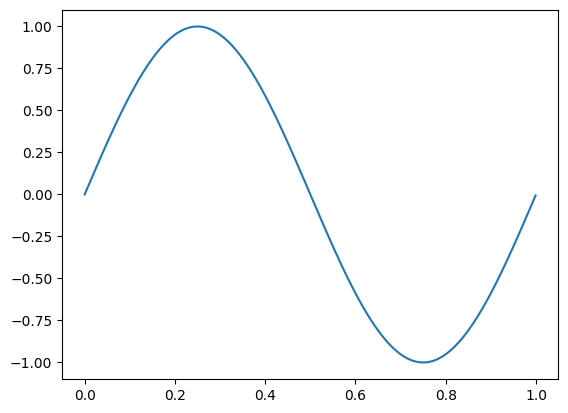

epoch: 0, acc: 0.003, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.005
epoch: 100, acc: 0.017, loss: 0.048 (data_loss: 0.048, reg_loss: 0.000), lr: 0.004549590536851684
epoch: 200, acc: 0.242, loss: 0.001 (data_loss: 0.001, reg_loss: 0.000), lr: 0.004170141784820684
epoch: 300, acc: 0.786, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.003849114703618168
epoch: 400, acc: 0.885, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0035739814152966403
epoch: 500, acc: 0.082, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.00333555703802535
epoch: 600, acc: 0.914, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0031269543464665416
epoch: 700, acc: 0.921, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.002942907592701589
epoch: 800, acc: 0.086, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0027793218454697055
epoch: 900, acc: 0.931, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0026329647182727752
epoch: 1000, acc: 0.936, loss: 0.0

epoch: 8300, acc: 0.979, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005376922249704269
epoch: 8400, acc: 0.974, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005319714863283328
epoch: 8500, acc: 0.980, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005263711969681019
epoch: 8600, acc: 0.978, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005208875924575476
epoch: 8700, acc: 0.980, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005155170636148056
epoch: 8800, acc: 0.979, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005102561485865905
epoch: 8900, acc: 0.981, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005051015254066068
epoch: 9000, acc: 0.982, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005000500050005
epoch: 9100, acc: 0.901, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0004950985246063966
epoch: 9200, acc: 0.981, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0004902441415825081
epo

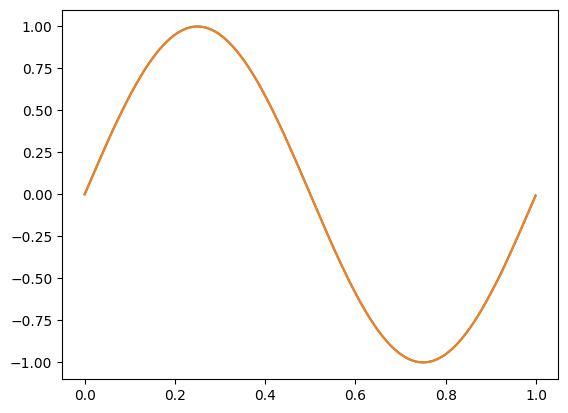

In [3]:
import numpy as np
import nnfs
from nnfs.datasets import sine_data

nnfs.init()


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask

# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Sigmoid activation
class Activation_Sigmoid:

    # Forward pass
    def forward(self, inputs):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output


# Linear activation
class Activation_Linear:

    # Forward pass
    def forward(self, inputs):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()


# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

# RMSprop optimizer
class Optimizer_RMSprop:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
            (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
            (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:

    # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                   np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                   np.sum(layer.weights * \
                                          layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                   np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                   np.sum(layer.biases * \
                                          layer.biases)

        return regularization_loss

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):  # L1 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)

        # Return losses
        return sample_losses


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Create dataset
X, y = sine_data()
plt.plot(X, y)
plt.show()

# Create Dense layer with 1 input feature and 64 output values
dense1 = Layer_Dense(1, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 64 output values
dense2 = Layer_Dense(64, 64)

# Create ReLU activation (to be used with Dense layer):
activation2 = Activation_ReLU()

# Create third Dense layer with 64 input features (as we take output
# of previous layer here) and 1 output value
dense3 = Layer_Dense(64, 1)

# Create Linear activation:
activation3 = Activation_Linear()

# Create loss function
loss_function = Loss_MeanSquaredError()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-3)


# Accuracy precision for accuracy calculation
# There are no really accuracy factor for regression problem,
# but we can simulate/approximate it. We'll calculate it by checking
# how many values have a difference to their ground truth equivalent
# less than given precision
# We'll calculate this precision as a fraction of standard deviation
# of all the ground truth values
accuracy_precision = np.std(y) / 250

# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function
    # of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation function
    # takes the output of second dense layer here
    activation2.forward(dense2.output)

    # Perform a forward pass through third Dense layer
    # takes outputs of activation function of second layer as inputs
    dense3.forward(activation2.output)

    # Perform a forward pass through activation function
    # takes the output of third dense layer here
    activation3.forward(dense3.output)

    # Calculate the data loss
    data_loss = loss_function.calculate(activation3.output, y)

    # Calculate regularization penalty
    regularization_loss = \
        loss_function.regularization_loss(dense1) + \
        loss_function.regularization_loss(dense2) + \
        loss_function.regularization_loss(dense3)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # To calculate it we're taking absolute difference between
    # predictions and ground truth values and compare if differences
    # are lower than given precision value
    predictions = activation3.output
    accuracy = np.mean(np.absolute(predictions - y) <
                       accuracy_precision)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(activation3.output, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()


import matplotlib.pyplot as plt

X_test, y_test = sine_data()

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()